In [2]:
import pandas as pd
import numpy as np

In [3]:
seoul_traffic = pd.read_excel('./data/노선별 시간대별 교통량(평일).xlsx')
seoul_traffic.head(5)

,서울도시고속도로 노선별 시간대별 교통량(평일평균),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,(단위 : 대/일)
0,시간대,내부순환로,NaN,강변북로,NaN,북부간선도로,NaN,올림픽대로,NaN,동부간선도로,NaN,분당수서로,NaN,경부고속도로,NaN,서부간선도로,NaN,강남순환로,NaN
1,NaN,동향,서향,동향,서향,동향,서향,동향,서향,북향,남향,북향,남향,북향,남향,북향,남향,동향,서향
2,0,1296,1012,2480,2086,1070,814,1945,2790,1916,1118,988,1097,1822,2239,1356,1486,531,803
3,1,880,695,1633,1374,748,570,1308,1974,1278,745,749,684,1297,1456,869,933,309,480
4,2,634,528,1217,1002,588,440,1018,1537,907,567,576,512,1015,1102,651,668,220,322


In [4]:
inner_e = seoul_traffic.iloc[2:,1]
inner_e

2     1296
3      880
4      634
5      590
6      923
7     2348
8     3659
9     3868
10    3731
11    3648
12    3637
13    3663
14    3659
15    3669
16    3688
17    3732
18    3686
19    3615
20    3525
21    3513
22    3499
23    3483
24    3236
25    2216
Name: Unnamed: 1, dtype: object

In [5]:
inner_w = seoul_traffic.iloc[2:,2]
inner_w

2     1012
3      695
4      528
5      536
6     1027
7     2793
8     4249
9     4091
10    3655
11    3666
12    3614
13    3547
14    3523
15    3491
16    3548
17    3638
18    3684
19    3626
20    3556
21    3456
22    3085
23    3009
24    2685
25    1707
Name: Unnamed: 2, dtype: object

In [6]:
inner = seoul_traffic.iloc[2:,1:3]
inner = inner.diff(axis=1)
inner = inner.abs()
inner_circle_diff = inner.iloc[:,1]
inner_diff = inner_circle_diff.values

In [8]:
inner = seoul_traffic.iloc[2:,1:3]
inner_mean = inner.mean(axis=1)
inner_mean = inner_mean.values

In [9]:
import matplotlib.pyplot as plt

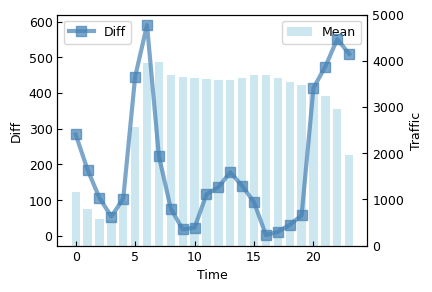

In [11]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 9

# 2. 데이터 준비
x = np.arange(24)
time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, inner_diff, '-s', color='steelblue', markersize=7, linewidth=3, alpha=0.7, label='Diff')
ax1.set_xlabel('Time')
ax1.set_ylabel('Diff')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, inner_mean, color='lightblue', label='Mean', alpha=0.6, width=0.7)
ax2.set_ylabel('Traffic')
ax2.tick_params(axis='y', direction='in')
ax2.set_ylim(0, 5000)

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()